<a href="https://colab.research.google.com/github/Bhavya830/Bhavya830/blob/main/bitcoin_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
api_key = '2f0fdd5d49254c06b7dc54cc45a4b628'
symbol = 'BTC/USD'
interval = '5min'
order = 'asc'
start_date = '2024-10-23 00:00:00'
end_date = '2024-12-24 00:00:00'

api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&oder={order}&apikey={api_key}'

In [ ]:
data = requests.get(api_url).json()
data_final = pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2024-12-24 00:00:00,94767.88,94767.88,94583.25,94593.64
1,2024-12-23 23:55:00,94649.54,94772.08,94641.64,94764.56
2,2024-12-23 23:50:00,94653.39,94734.74,94597.96,94651.92
3,2024-12-23 23:45:00,94657.69,94711.53,94534,94653.38
4,2024-12-23 23:40:00,94603.56,94734.56,94581.45,94657.79
...,...,...,...,...,...
4995,2024-12-06 15:45:00,99300,99607.9,99288.9,99543.4
4996,2024-12-06 15:40:00,99334.01,99377.98,99102.08,99300
4997,2024-12-06 15:35:00,99374.06,99550,99305.5,99341.55
4998,2024-12-06 15:30:00,99164.97,99374.05,99101.04,99374.05


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [ ]:
scaled_data.shape

(5000, 1)

In [ ]:
time_intervals_to_train = 24
prediction_interval = 12

x_train = []
y_train = []

In [ ]:
for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
  x_train.append(scaled_data[i - time_intervals_to_train: i,0])
  y_train.append(scaled_data[i + prediction_interval,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
x_train.shape

(4964, 24, 1)

In [ ]:
model = Sequential()

model.add(LSTM(128,return_sequences = True, input_shape = (x_train.shape[1],1), activation = 'relu'))
model.add(Dropout(0.4))
model.add(LSTM(64,return_sequences = True, activation = 'relu'))
model.add(Dropout(0.3))
model.add(LSTM(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss = 'mean_squared_error', optimizer= 'adam', metrics= ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 1.3840e-04 - loss: 0.0291
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 4.5020e-04 - loss: 0.0035
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 6.3177e-04 - loss: 0.0033
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 2.7736e-04 - loss: 0.0029
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 2.1475e-04 - loss: 0.0028
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 1.7947e-04 - loss: 0.0027
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 4.5240e-04 - loss: 0.0026
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 2.5060e-04 - loss: 0.0026
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 3.9709e-04 - loss: 0.0025
Epoch 10/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 3.1224e-04 - loss: 0.0025


In [ ]:
test_start = '2024-10-20 00:00:00'
test_end = '2024-10-23 00:00:00'

test_api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={test_start}&end_date={test_end}&interval={interval}&oder={order}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_data_final = pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2024-10-23 00:00:00,67439.31,67470.47,67387.06,67396.35
1,2024-10-22 23:55:00,67388.98,67435.4,67370.14,67431.31
2,2024-10-22 23:50:00,67333.59,67408.94,67333.58,67398.25
3,2024-10-22 23:45:00,67436.69,67454.13,67295.53,67332.98
4,2024-10-22 23:40:00,67437.41,67437.41,67437.41,67437.41
...,...,...,...,...,...
824,2024-10-20 00:20:00,68443.09,68443.09,68426.94,68429.25
825,2024-10-20 00:15:00,68433.95,68443.09,68409.92,68440.26
826,2024-10-20 00:10:00,68435.99,68436,68414.53,68426.07
827,2024-10-20 00:05:00,68391.08,68445.04,68383.41,68395.91


In [ ]:
test_data_final['open']

,open
0,67439.31
1,67388.98
2,67333.59
3,67436.69
4,67437.41
...,...
824,68443.09
825,68433.95
826,68435.99
827,68391.08


In [ ]:
test_data_final['close']

,close
0,67396.35
1,67431.31
2,67398.25
3,67332.98
4,67437.41
...,...
824,68429.25
825,68440.26
826,68426.07
827,68395.91


In [ ]:
bitcoin_prices = pd.to_numeric(test_data_final['close'],errors = 'coerce').values

test_inputs = test_data_final['close'].values
test_inputs = test_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(test_inputs)

In [ ]:
model_inputs

array([[0.24933775],
       [0.26232645],
       [0.25004365],
       [0.22579387],
       [0.26459278],
       [0.27142151],
       [0.29346069],
       [0.30541654],
       [0.33273888],
       [0.3084408 ],
       [0.32456893],
       [0.34956921],
       [0.38724611],
       [0.37663148],
       [0.38061429],
       [0.37907615],
       [0.38455623],
       [0.36494685],
       [0.3311636 ],
       [0.34765211],
       [0.33892115],
       [0.33995029],
       [0.34573873],
       [0.36628808],
       [0.32735541],
       [0.30273038],
       [0.29554869],
       [0.28311357],
       [0.25773062],
       [0.25950282],
       [0.26677738],
       [0.2613679 ],
       [0.27288534],
       [0.26710804],
       [0.2693781 ],
       [0.2737733 ],
       [0.31010525],
       [0.30617075],
       [0.28931813],
       [0.27565696],
       [0.27561981],
       [0.26711548],
       [0.30085415],
       [0.29276593],
       [0.28707409],
       [0.31338215],
       [0.28035682],
       [0.304

In [ ]:
model_inputs.shape

(829, 1)

In [ ]:
x_test =[]

for x in range(time_intervals_to_train, len(model_inputs)):
  x_test.append(model_inputs[x - time_intervals_to_train: x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
x_test.shape

(805, 24, 1)

In [ ]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
prediction_prices

array([[67696.08 ],
       [67692.36 ],
       [67686.445],
       [67677.4  ],
       [67665.195],
       [67652.28 ],
       [67637.336],
       [67621.54 ],
       [67604.58 ],
       [67587.31 ],
       [67567.3  ],
       [67546.5  ],
       [67525.21 ],
       [67505.47 ],
       [67490.445],
       [67479.79 ],
       [67473.266],
       [67470.1  ],
       [67469.84 ],
       [67472.766],
       [67476.53 ],
       [67481.625],
       [67487.695],
       [67493.3  ],
       [67498.305],
       [67502.51 ],
       [67505.71 ],
       [67507.5  ],
       [67508.555],
       [67509.87 ],
       [67511.63 ],
       [67514.02 ],
       [67516.79 ],
       [67518.11 ],
       [67516.8  ],
       [67511.94 ],
       [67503.56 ],
       [67493.27 ],
       [67481.055],
       [67467.1  ],
       [67453.266],
       [67441.41 ],
       [67432.5  ],
       [67425.85 ],
       [67419.73 ],
       [67414.76 ],
       [67411.5  ],
       [67409.82 ],
       [67406.13 ],
       [67400.19 ],


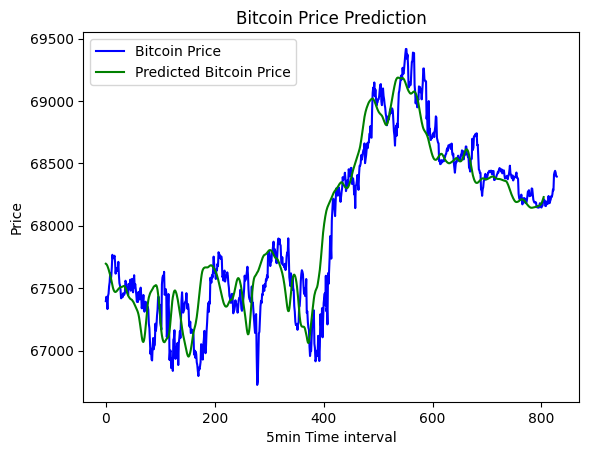

In [ ]:
plt.plot(bitcoin_prices, color = 'blue', label = 'Bitcoin Price')
plt.plot(prediction_prices, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('5min Time interval')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
last_data = model_inputs[len(model_inputs)+1 - time_intervals_to_train: len(model_inputs)+1,0]
last_data = np.array(last_data)

In [ ]:
last_data.shape

(23,)

In [ ]:
last_data = np.reshape(last_data, (1,last_data.shape[0],1))

In [ ]:
prediction = model.predict(last_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


In [ ]:
prediction = scaler.inverse_transform(prediction)

In [ ]:
prediction

array([[68240.234]], dtype=float32)